In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
dataset = pd.read_csv("closeprice predicted-actual 2023.csv")

In [3]:
dataset = dataset.set_index('Tanggal')

In [4]:
dataset

,Harga Aktual,Harga Prediksi
Tanggal,,
2023-01-09,1111.33,1113.8503
2023-01-10,1075.98,1113.9148
2023-01-11,1056.63,1091.1407
2023-01-12,1078.08,1076.7391
2023-01-13,1072.92,1080.8995
2023-01-16,1083.22,1078.0969
2023-01-17,1105.43,1084.0410
2023-01-18,1101.50,1102.7361
2023-01-19,1111.40,1103.3456


In [5]:
#Actual Volatility Calculation

dataset['Returns'] = dataset['Harga Aktual'].pct_change()

window = 5
dataset['Volatilitas Aktual'] = dataset['Returns'].rolling(window).std() * np.sqrt(window)
trading_days_per_year = 252
dataset['Volatilitas Aktual'] = dataset['Volatilitas Aktual'] * np.sqrt(trading_days_per_year)


In [6]:
#Actual Volatility Calculation

dataset['returns predicted'] = dataset['Harga Prediksi'].pct_change()

window = 5
dataset['Volatilitas Prediksi'] = dataset['returns predicted'].rolling(window).std() * np.sqrt(window)
trading_days_per_year = 252
dataset['Volatilitas Prediksi'] = dataset['Volatilitas Prediksi'] * np.sqrt(trading_days_per_year)

In [7]:
dataset.fillna(0,inplace=True)

In [8]:
dates = dataset.index
dates = pd.to_datetime(dates)

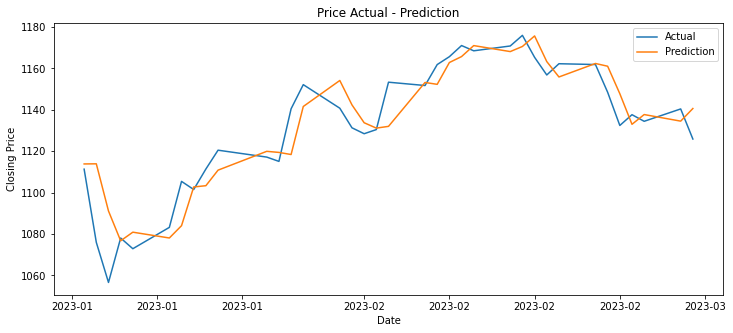

In [9]:
plt.figure(figsize=(12, 5))
plt.plot(dates,dataset['Harga Aktual'], label='Actual')
plt.plot(dates,dataset['Harga Prediksi'], label='Prediction')
# Format the x-axis tick labels to show only the years
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis_date()
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# # Rotate the tick labels for better visibility
# plt.gcf().autofmt_xdate()

plt.title('Price Actual - Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
# plt.savefig('Closing price actual-predicted 2023.png')
plt.show()

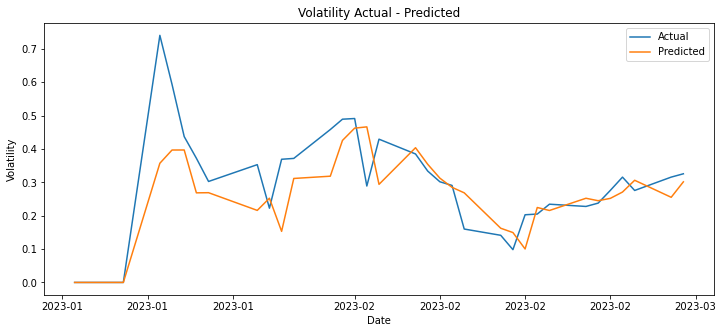

In [10]:
plt.figure(figsize=(12, 5))
plt.plot(dates,dataset['Volatilitas Aktual'], label='Actual')
plt.plot(dates,dataset['Volatilitas Prediksi'], label='Predicted')
# Format the x-axis tick labels to show only the years
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis_date()
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# # Rotate the tick labels for better visibility
# plt.gcf().autofmt_xdate()

plt.title('Volatility Actual - Predicted')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.savefig('Volatility actual-predicted 2023.png')
plt.show()

In [11]:
dataset[['Harga Aktual','Harga Prediksi']].describe()

,Harga Aktual,Harga Prediksi
count,36.000000,36.000000
mean,1132.139722,1133.438969
std,31.348899,28.917476
min,1056.630000,1076.739100
25%,1114.160000,1113.898675
50%,1136.035000,1136.108600
75%,1158.065000,1157.142225
max,1175.940000,1175.655200


In [12]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(dataset['Harga Aktual'], dataset['Harga Prediksi'],squared=False)
rmse

12.686888606779537

In [13]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(dataset['Harga Aktual'], dataset['Harga Prediksi'])
mape

0.008214119821819695

In [14]:
R = np.corrcoef(dataset['Harga Aktual'], dataset['Harga Prediksi'] ,rowvar=False )
#test_actual.shape,test_pred.shape
R[0:1]

array([[1.        , 0.91290545]])

In [15]:
rmse,mape,R[0,1]

(12.686888606779537, 0.008214119821819695, 0.9129054466165099)

In [16]:
dataset[['Volatilitas Aktual','Volatilitas Prediksi']].describe()

,Volatilitas Aktual,Volatilitas Prediksi
count,36.000000,36.000000
mean,0.284608,0.248536
std,0.169600,0.130894
min,0.000000,0.000000
25%,0.204403,0.202330
50%,0.296185,0.268535
75%,0.371816,0.313979
max,0.740460,0.466210


In [17]:
jkse = pd.read_excel("Jakarta Stock Exchange LQ45 Historical Data.xlsx")

In [18]:
jkse = jkse.set_index('Date')

In [19]:
lq45 = jkse.iloc[5:-1].copy()

In [20]:
#Actual Volatility Calculation

lq45['Returns'] = lq45['Price'].pct_change()

window = 5
lq45['Volatilitas Aktual'] = lq45['Returns'].rolling(window).std() * np.sqrt(window)
trading_days_per_year = 252
lq45['Volatilitas Aktual'] = lq45['Volatilitas Aktual'] * np.sqrt(trading_days_per_year)


In [21]:
lq45.shape

(36, 5)

In [22]:
lq45.fillna(0,inplace=True)

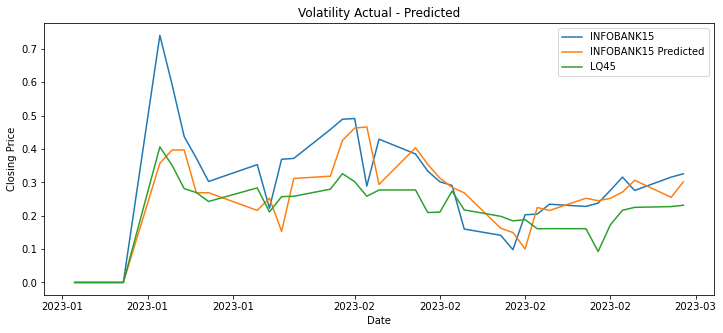

In [23]:
plt.figure(figsize=(12, 5))
plt.plot(dates,dataset['Volatilitas Aktual'], label='INFOBANK15')
plt.plot(dates,dataset['Volatilitas Prediksi'], label='INFOBANK15 Predicted')
plt.plot(dates,lq45['Volatilitas Aktual'],label = 'LQ45')
# Format the x-axis tick labels to show only the years
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis_date()
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# # Rotate the tick labels for better visibility
# plt.gcf().autofmt_xdate()

plt.title('Volatility Actual - Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
# plt.savefig('Volatility actual-predicted 2023.png')
plt.show()

In [24]:
ihsg = pd.read_excel("Data Historis Jakarta Stock Exchange Composite.xlsx")

In [25]:
ihsg['Terakhir'] = [item.replace('.',"") for item in ihsg['Terakhir']]

In [26]:
ihsg['Terakhir'] = [item.replace(',',".") for item in ihsg['Terakhir']]

In [27]:
ihsg['Pembukaan'] = [item.replace('.',"") for item in ihsg['Pembukaan']]
ihsg['Pembukaan'] = [item.replace(',',".") for item in ihsg['Pembukaan']]

In [28]:
ihsg.drop(['Tertinggi','Perubahan%'],axis=1,inplace=True)

In [29]:
ihsg['Terakhir'] = ihsg['Terakhir'].astype(float)
ihsg['Pembukaan'] = ihsg['Pembukaan'].astype(float)

In [30]:
ihsg= ihsg.set_index('Tanggal')

In [31]:
ihsg_volatility= ihsg.iloc[5:-1].copy()

In [32]:
#Actual Volatility Calculation

ihsg_volatility['Returns'] = ihsg_volatility['Terakhir'].pct_change()

window = 5
ihsg_volatility['Volatilitas Aktual'] = ihsg_volatility['Returns'].rolling(window).std() * np.sqrt(window)
trading_days_per_year = 252
ihsg_volatility['Volatilitas Aktual'] = ihsg_volatility['Volatilitas Aktual'] * np.sqrt(trading_days_per_year)

In [33]:
ihsg_volatility.fillna(0,inplace=True)

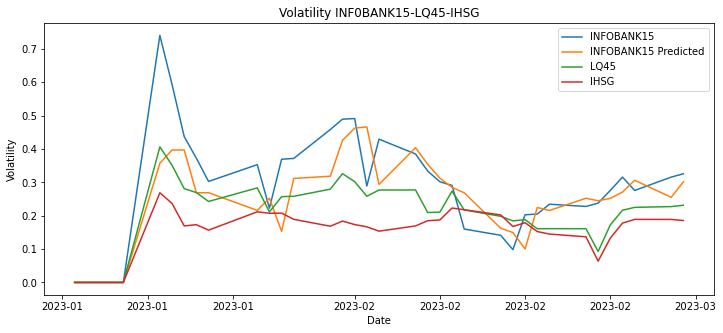

In [34]:
plt.figure(figsize=(12, 5))
plt.plot(dates,dataset['Volatilitas Aktual'], label='INFOBANK15')
plt.plot(dates,dataset['Volatilitas Prediksi'], label='INFOBANK15 Predicted')
plt.plot(dates,lq45['Volatilitas Aktual'],label = 'LQ45')
plt.plot(dates,ihsg_volatility['Volatilitas Aktual'],label='IHSG')
# Format the x-axis tick labels to show only the years
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis_date()
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# # Rotate the tick labels for better visibility
# plt.gcf().autofmt_xdate()

plt.title('Volatility INF0BANK15-LQ45-IHSG')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.savefig('Volatility INF0BANK15-LQ45-IHSG  2023.png')
plt.show()

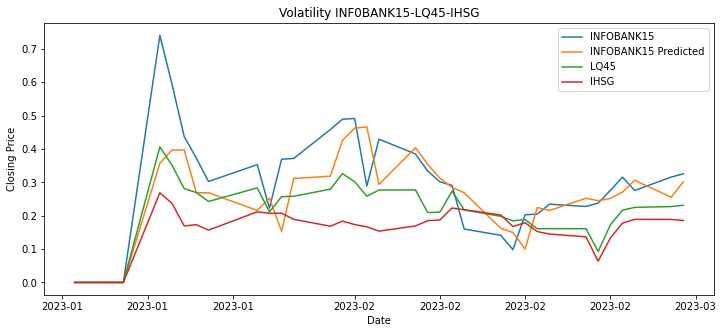

In [35]:
plt.figure(figsize=(12, 5))
plt.plot(dates,dataset['Volatilitas Aktual'], label='INFOBANK15')
plt.plot(dates,dataset['Volatilitas Prediksi'], label='INFOBANK15 Predicted')
plt.plot(dates,lq45['Volatilitas Aktual'],label = 'LQ45')
plt.plot(dates,ihsg_volatility['Volatilitas Aktual'],label='IHSG')
# Format the x-axis tick labels to show only the years
date_format = mdates.DateFormatter('%Y-%m')
plt.gca().xaxis.set_major_formatter(date_format)
# plt.gca().xaxis_date()
# plt.gca().xaxis.set_major_locator(mdates.YearLocator())
# # Rotate the tick labels for better visibility
# plt.gcf().autofmt_xdate()

plt.title('Volatility INF0BANK15-LQ45-IHSG')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
# plt.savefig('Volatility INF0BANK15-LQ45-IHSG  2023.png')
plt.show()

In [36]:
dataset[['Volatilitas Aktual','Volatilitas Prediksi']].describe()

,Volatilitas Aktual,Volatilitas Prediksi
count,36.000000,36.000000
mean,0.284608,0.248536
std,0.169600,0.130894
min,0.000000,0.000000
25%,0.204403,0.202330
50%,0.296185,0.268535
75%,0.371816,0.313979
max,0.740460,0.466210


In [37]:
lq45['Volatilitas Aktual'].describe()

count    36.000000
mean      0.205864
std       0.102075
min       0.000000
25%       0.169664
50%       0.221178
75%       0.274490
max       0.406202
Name: Volatilitas Aktual, dtype: float64

In [38]:
ihsg_volatility['Volatilitas Aktual'].describe()

count    36.000000
mean      0.154723
std       0.071381
min       0.000000
25%       0.150643
50%       0.173300
75%       0.189041
max       0.268632
Name: Volatilitas Aktual, dtype: float64

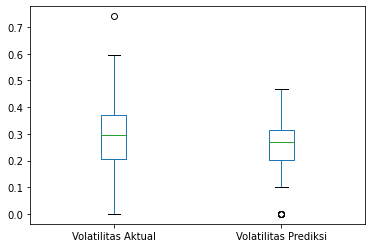

In [39]:
dataset[['Volatilitas Aktual','Volatilitas Prediksi']].plot(kind='box')

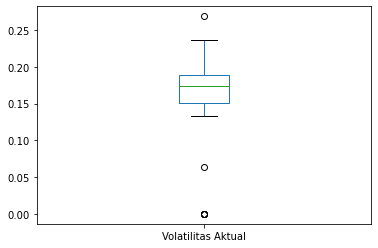

In [40]:
ihsg_volatility['Volatilitas Aktual'].plot(kind='box')

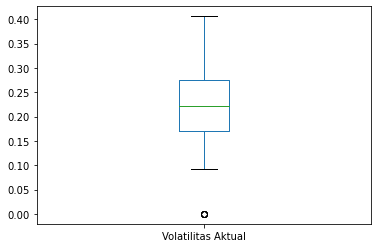

In [41]:
lq45['Volatilitas Aktual'].plot(kind='box')

In [45]:
volatility_sample = dataset.head(9)
volatility_sample.to_excel("volatility_sample.xlsx")

In [46]:
volatility_sample

,Harga Aktual,Harga Prediksi,Returns,Volatilitas Aktual,returns predicted,Volatilitas Prediksi
Tanggal,,,,,,
2023-01-09,1111.33,1113.8503,0.000000,0.000000,0.000000,0.000000
2023-01-10,1075.98,1113.9148,-0.031809,0.000000,0.000058,0.000000
2023-01-11,1056.63,1091.1407,-0.017984,0.000000,-0.020445,0.000000
2023-01-12,1078.08,1076.7391,0.020300,0.000000,-0.013199,0.000000
2023-01-13,1072.92,1080.8995,-0.004786,0.000000,0.003864,0.000000
2023-01-16,1083.22,1078.0969,0.009600,0.740460,-0.002593,0.357182
2023-01-17,1105.43,1084.0410,0.020504,0.593507,0.005514,0.396853
2023-01-18,1101.50,1102.7361,-0.003555,0.437040,0.017246,0.396945
2023-01-19,1111.40,1103.3456,0.008988,0.372195,0.000553,0.268525
